In [1]:
import os

import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from glob import glob
from tqdm import tqdm
from tqdm.auto import tqdm
from PIL import Image
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 결측치 보간된 aws
aws=pd.read_csv("imputed_aws(ewm).csv",encoding='cp949',index_col=0)
# 결측치 보간된 asos
asos=pd.read_csv("imputed_asos(ewm).csv",encoding='cp949',index_col=0)
# 결측치 보간된 기상자료와 산불 맵핑데이터 
fire=pd.read_csv("data/new_data.csv",encoding='cp949')

In [3]:
aws.head()
asos.head()
fire.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s)
0,12,안면도(감),2001-10-12,NaN,0.0,NaN
1,12,안면도(감),2002-01-04,NaN,0.0,NaN
2,12,안면도(감),2002-01-18,NaN,0.0,NaN
3,12,안면도(감),2002-01-19,NaN,0.0,NaN
4,12,안면도(감),2002-02-01,NaN,0.0,NaN


,지점,지점명,일시,평균 상대습도(%)
0,90,속초,2001-01-01,37.4
1,90,속초,2001-01-02,28.6
2,90,속초,2001-01-03,18.9
3,90,속초,2001-01-04,16.6
4,90,속초,2001-01-05,22.8


,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,...,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,지점_aws,거리_aws
0,2001-01-01,제주,제주특별자치도 서귀포시 성산읍 성산리,126.932596,33.467104,0.30,74.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.516786
1,2001-01-04,경북,경상북도 영천시 서산동,128.892471,35.979027,0.50,41.8,45.5,48.6,48.6,...,-2.7,2.2,-2.4,NaN,0.0,0.0,0.0,NaN,840.0,10.195594
2,2001-01-05,강원,강원도 강릉시 성산면 어흘리,128.780562,37.710108,0.06,45.0,40.1,48.3,61.8,...,-4.8,-4.4,0.2,-0.1,0.0,0.0,0.0,0.0,524.0,15.220659
3,2001-01-03,강원,강원도 홍천군 홍천읍 상오안리,127.814492,37.640889,0.20,44.5,58.9,68.3,NaN,...,-4.8,-7.3,NaN,NaN,0.5,0.0,NaN,NaN,558.0,11.207163
4,2001-01-04,부산,부산광역시 사하구 다대동,128.966599,35.052936,0.05,35.4,37.9,44.1,29.8,...,-4.2,0.8,-2.4,NaN,0.0,0.0,0.0,NaN,160.0,7.929285


In [4]:
fire[fire['지점_aws'].isna()==1]
fire.drop(fire[fire['지점_aws'].isna()==1].index,inplace=True)

,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,...,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,지점_aws,거리_aws
31,2001-02-19,제주,제주특별자치도 서귀포시 색달동,126.415192,33.300378,0.5,64.1,79.5,62.6,49.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loc=fire['지점_aws'].astype(int).unique().tolist()
loc

[725,
 840,
 524,
 558,
 160,
 938,
 906,
 580,
 786,
 807,
 799,
 904,
 648,
 830,
 783,
 762,
 839,
 708,
 746,
 729,
 791,
 923,
 722,
 804,
 853,
 941,
 766,
 835,
 787,
 910,
 401,
 828,
 784,
 710,
 649,
 748,
 623,
 924,
 522,
 606,
 815,
 650,
 608,
 636,
 925,
 778,
 642,
 841,
 509,
 646,
 602,
 818,
 621,
 834,
 647,
 832,
 811,
 900,
 542,
 582,
 775,
 833,
 806,
 617,
 734,
 406,
 820,
 803,
 605,
 643,
 821,
 819,
 620,
 521,
 604,
 622,
 801,
 630,
 579,
 944,
 546,
 905,
 629,
 414,
 511,
 529,
 929,
 500,
 849,
 936,
 534,
 619,
 951,
 702,
 768,
 934,
 551,
 822,
 499,
 914,
 744,
 903,
 592,
 583,
 943,
 836,
 409,
 523,
 618,
 573,
 764,
 569,
 504,
 531,
 633,
 765,
 420,
 527,
 850,
 415,
 419,
 939,
 530,
 802,
 759,
 940,
 812,
 813,
 848,
 635,
 402,
 825,
 612,
 703,
 515,
 588,
 407,
 565,
 417,
 945,
 707,
 763,
 519,
 920,
 593,
 626,
 416,
 901,
 533,
 505,
 937,
 909,
 627,
 657,
 570,
 842,
 713,
 816,
 738,
 795,
 706,
 574,
 625,
 831,
 144,
 562,
 769

In [6]:
fire.columns

Index(['날짜', '발생지역', '주소', '경도', '위도', '피해면적', '상대습도', '상대습도_1days_prev',
       '상대습도_2days_prev', '상대습도_3days_prev', '상대습도_4days_prev', '실효습도',
       '지점_asos', '거리_asos', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '지점_aws',
       '거리_aws'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df=[]  # 지점별로 scaled 된 데이터 
for i in tqdm(range(len(loc))):

    scaler = StandardScaler()
    tmp=fire[fire['지점_aws']==loc[i]]
    tmp.reset_index(drop=True,inplace=True)
    unuse=['날짜','발생지역','주소','경도','위도','피해면적','지점_aws','거리_aws','강수량'] #scaler 적용시키지 않을 컬럼
    use=fire.columns.drop(unuse) # scaler 적용시킬 컬럼 
    
    scaler.fit(tmp[use])
    tmp_scaled = scaler.transform(tmp[use]) 
    tmp_scaled = pd.DataFrame(tmp_scaled, columns=tmp[use].columns)

    result=pd.concat([tmp[unuse],tmp_scaled[use]],axis=1)
    result=result[tmp.columns]
    
    scaled_df.append(result)

  0%|          | 0/485 [00:00<?, ?it/s]

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

StandardScaler()

In [8]:
scaled_df[0]

,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,...,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,지점_aws,거리_aws
0,2001-01-01,제주,제주특별자치도 서귀포시 성산읍 성산리,126.932596,33.467104,0.3,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.516786


In [9]:
df=pd.DataFrame()
for i in tqdm(range(len(scaled_df))):
    df=pd.concat([df,scaled_df[i]])
    df.reset_index(inplace=True,drop=True)
df.info()

  0%|          | 0/485 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               10020 non-null  object 
 1   발생지역             10020 non-null  object 
 2   주소               10020 non-null  object 
 3   경도               10020 non-null  float64
 4   위도               10020 non-null  float64
 5   피해면적             10020 non-null  float64
 6   상대습도             9746 non-null   float64
 7   상대습도_1days_prev  9743 non-null   float64
 8   상대습도_2days_prev  9743 non-null   float64
 9   상대습도_3days_prev  9742 non-null   float64
 10  상대습도_4days_prev  9740 non-null   float64
 11  실효습도             9740 non-null   float64
 12  지점_asos          9746 non-null   float64
 13  거리_asos          9746 non-null   float64
 14  기온               10020 non-null  float64
 15  강수량              10020 non-null  float64
 16  풍속               9995 non-null   float64
 17  기온_1days_pre

In [10]:
df.head()

,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,...,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,지점_aws,거리_aws
0,2001-01-01,제주,제주특별자치도 서귀포시 성산읍 성산리,126.932596,33.467104,0.3,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,6.516786
1,2001-01-04,경북,경상북도 영천시 서산동,128.892471,35.979027,0.5,-0.268204,-0.063850,0.018506,-0.271297,...,-1.482017,-0.866910,-1.336523,NaN,0.0,0.0,-0.221875,NaN,840.0,10.195594
2,2001-02-20,경북,경상북도 경산시 하양읍 부호리,128.794555,35.906939,0.1,1.110375,0.488218,-0.022270,-0.699740,...,-0.410988,-0.557300,-1.069312,-1.164728,0.0,0.0,-0.221875,-0.283216,840.0,1.894873
3,2001-03-12,경북,경상북도 경산시 와촌면 음양리,128.754735,35.957202,3.0,-1.133645,-0.507058,-0.601293,-1.143762,...,-0.878794,-0.495377,-0.959998,-1.317593,0.0,0.0,-0.221875,-0.283216,840.0,7.311125
4,2001-03-16,경북,경상북도 경산시 진량읍 마곡리,128.848482,35.840453,0.1,-0.015465,-0.234913,1.013448,0.453161,...,0.106061,0.185767,-0.328408,-0.629697,0.0,0.0,-0.221875,-0.283216,840.0,8.590008


In [11]:
df=df.sort_values(by='날짜') 
df.reset_index(inplace=True,drop=True)

In [12]:
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from IPython.display import set_matplotlib_formats

sns.set(style='white', context='notebook', palette='deep')
line_color = ['#FFBF00','#FF7F50','#DE3163','#9FE2BF','#40E0D0','#6495ED','#117A65','#2471A3','#CCCCFF','#8E44AD','#CD5C5C' ,'#F08080','#FA8072' ,'#E9967A' ,'#FFA07A']
plt.style.use('fivethirtyeight')
plt.style.use("seaborn-whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])
%matplotlib inline

['Malgun Gothic']


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '-2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(0, -20.0, '-20'),
  Text(0, -10.0, '-10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40')])

Text(0, 0.5, 'temp normalize')

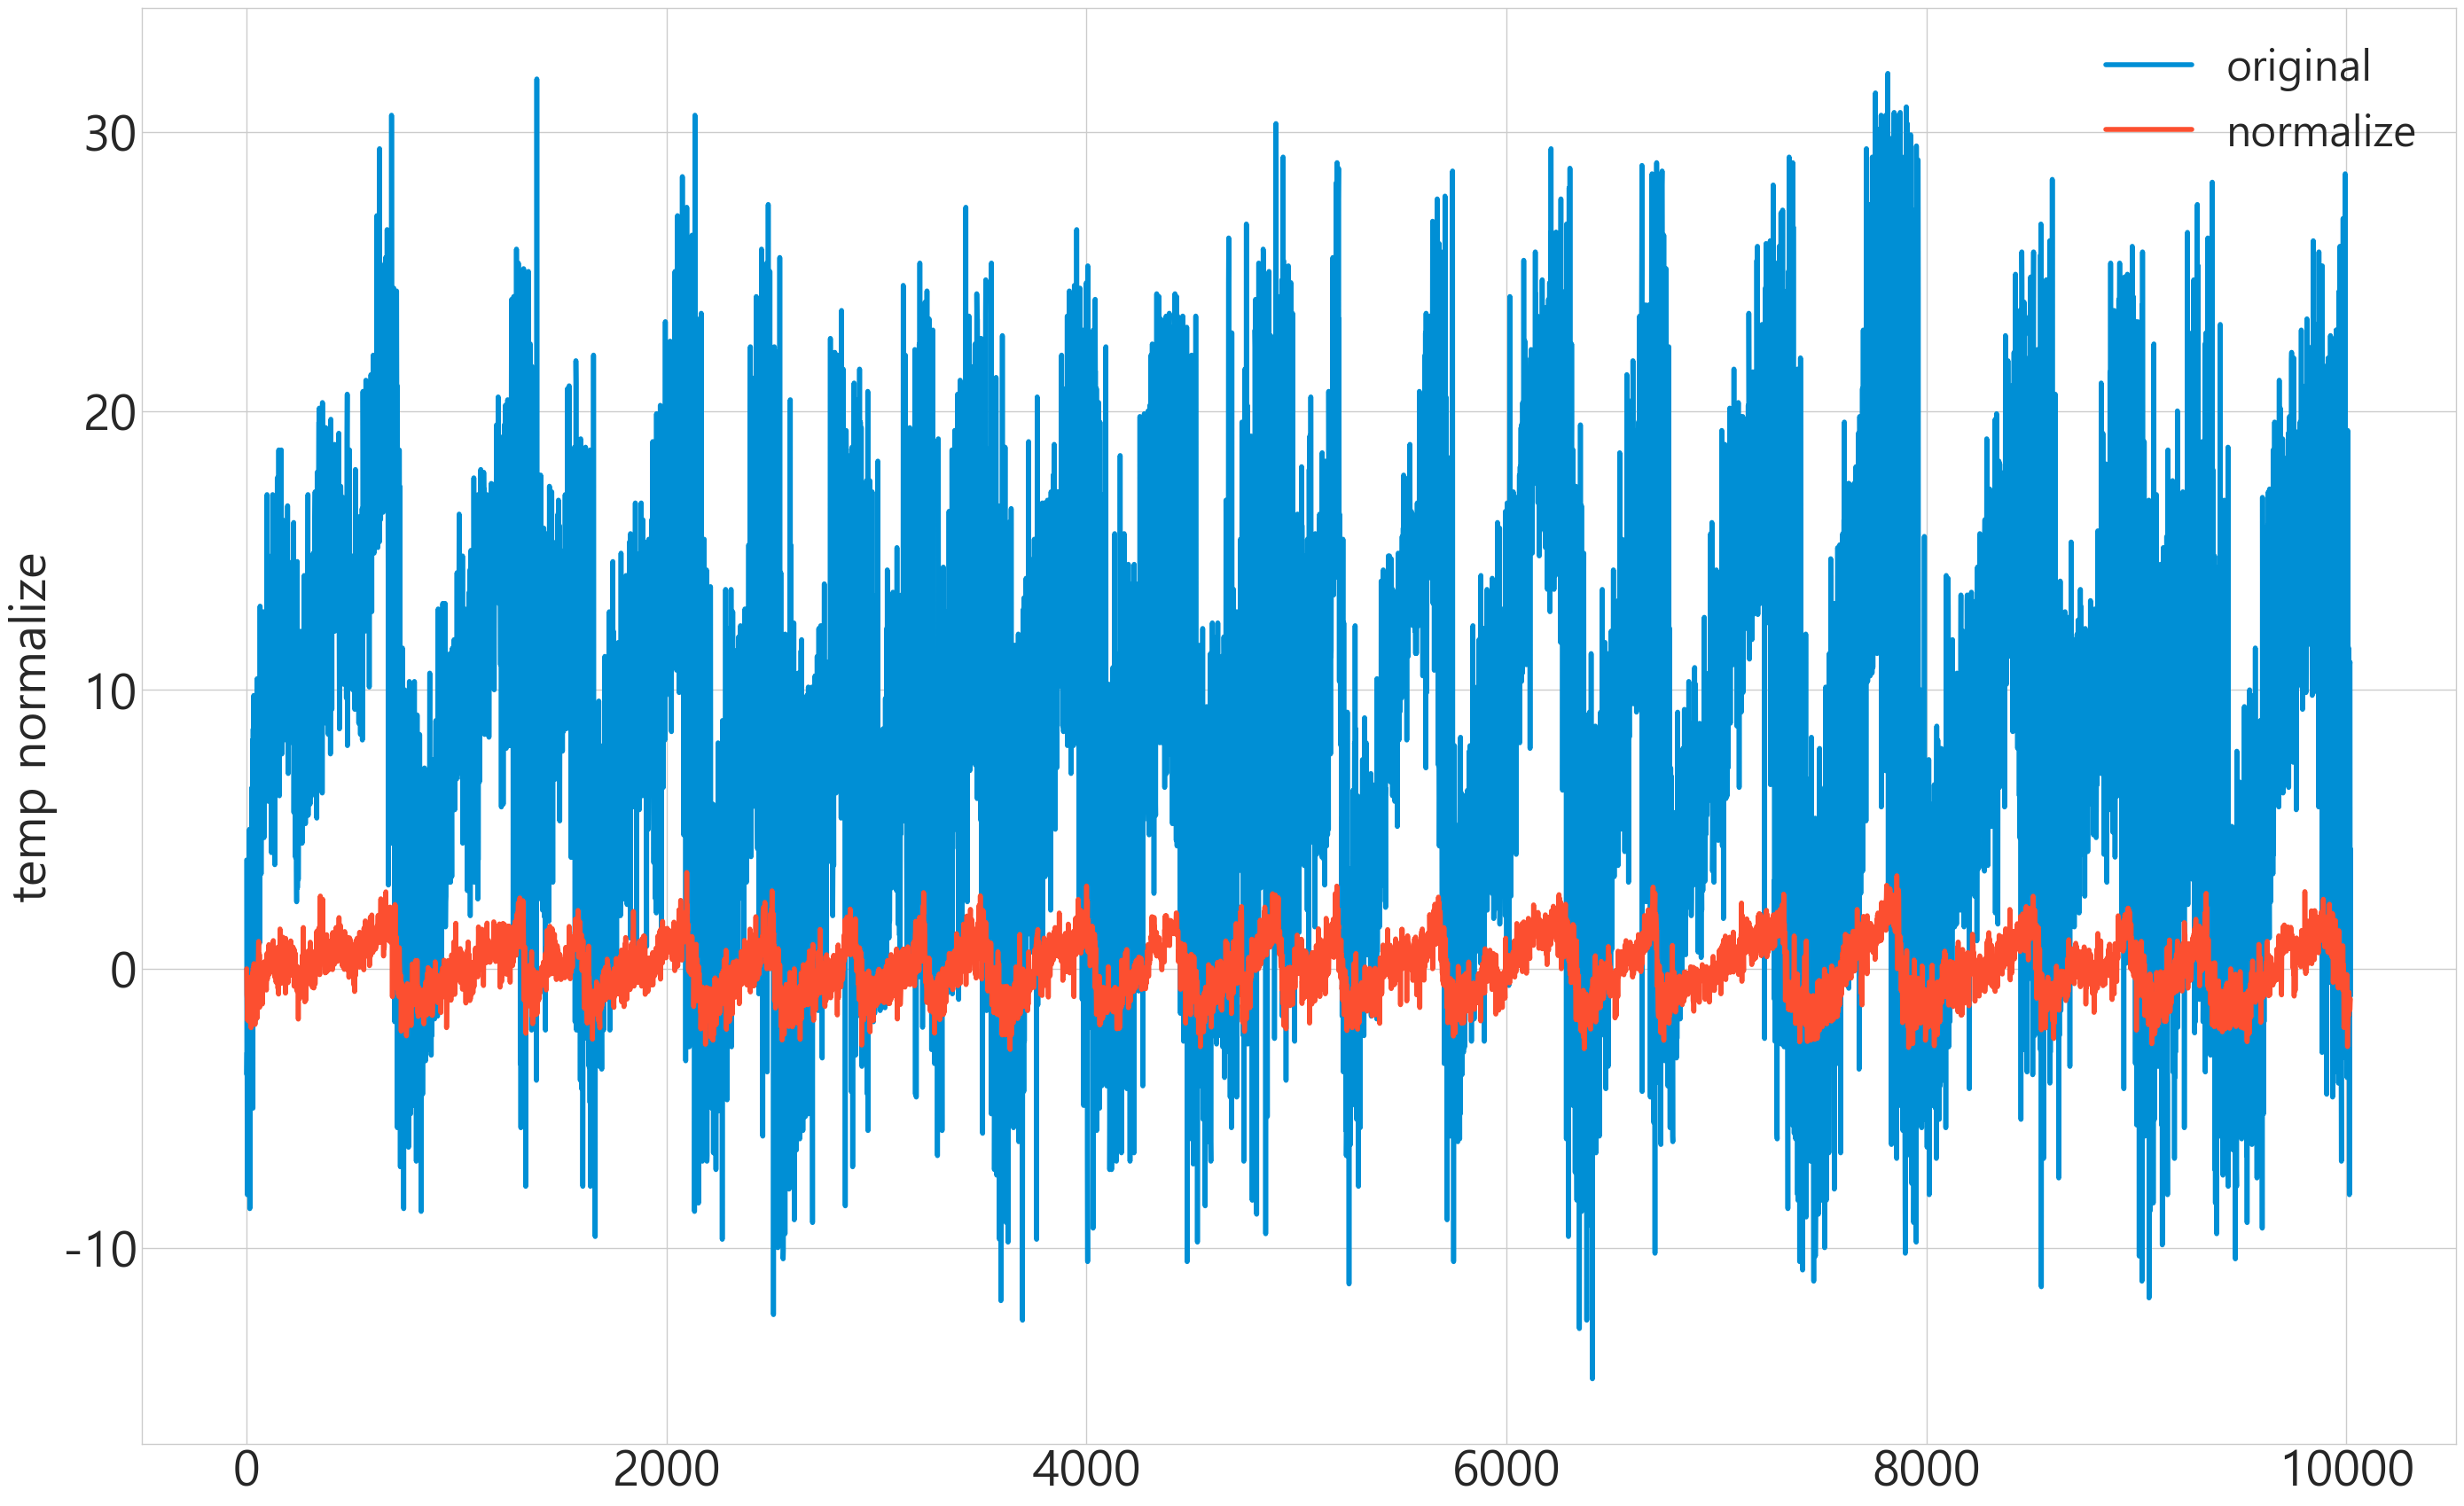

In [13]:

fig=plt.figure(figsize=(30,20),facecolor='white')
plt.plot(df.index,fire['기온'])
plt.plot(df.index,df['기온'])
plt.xticks(fontsize= 40)
plt.yticks(fontsize= 40)
plt.ylabel("temp normalize",fontsize= 40)
plt.legend(['original','normalize'],fontsize=35)
plt.show()

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '-2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, -20.0, '-20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

Text(0, 0.5, 'humidity normalize')

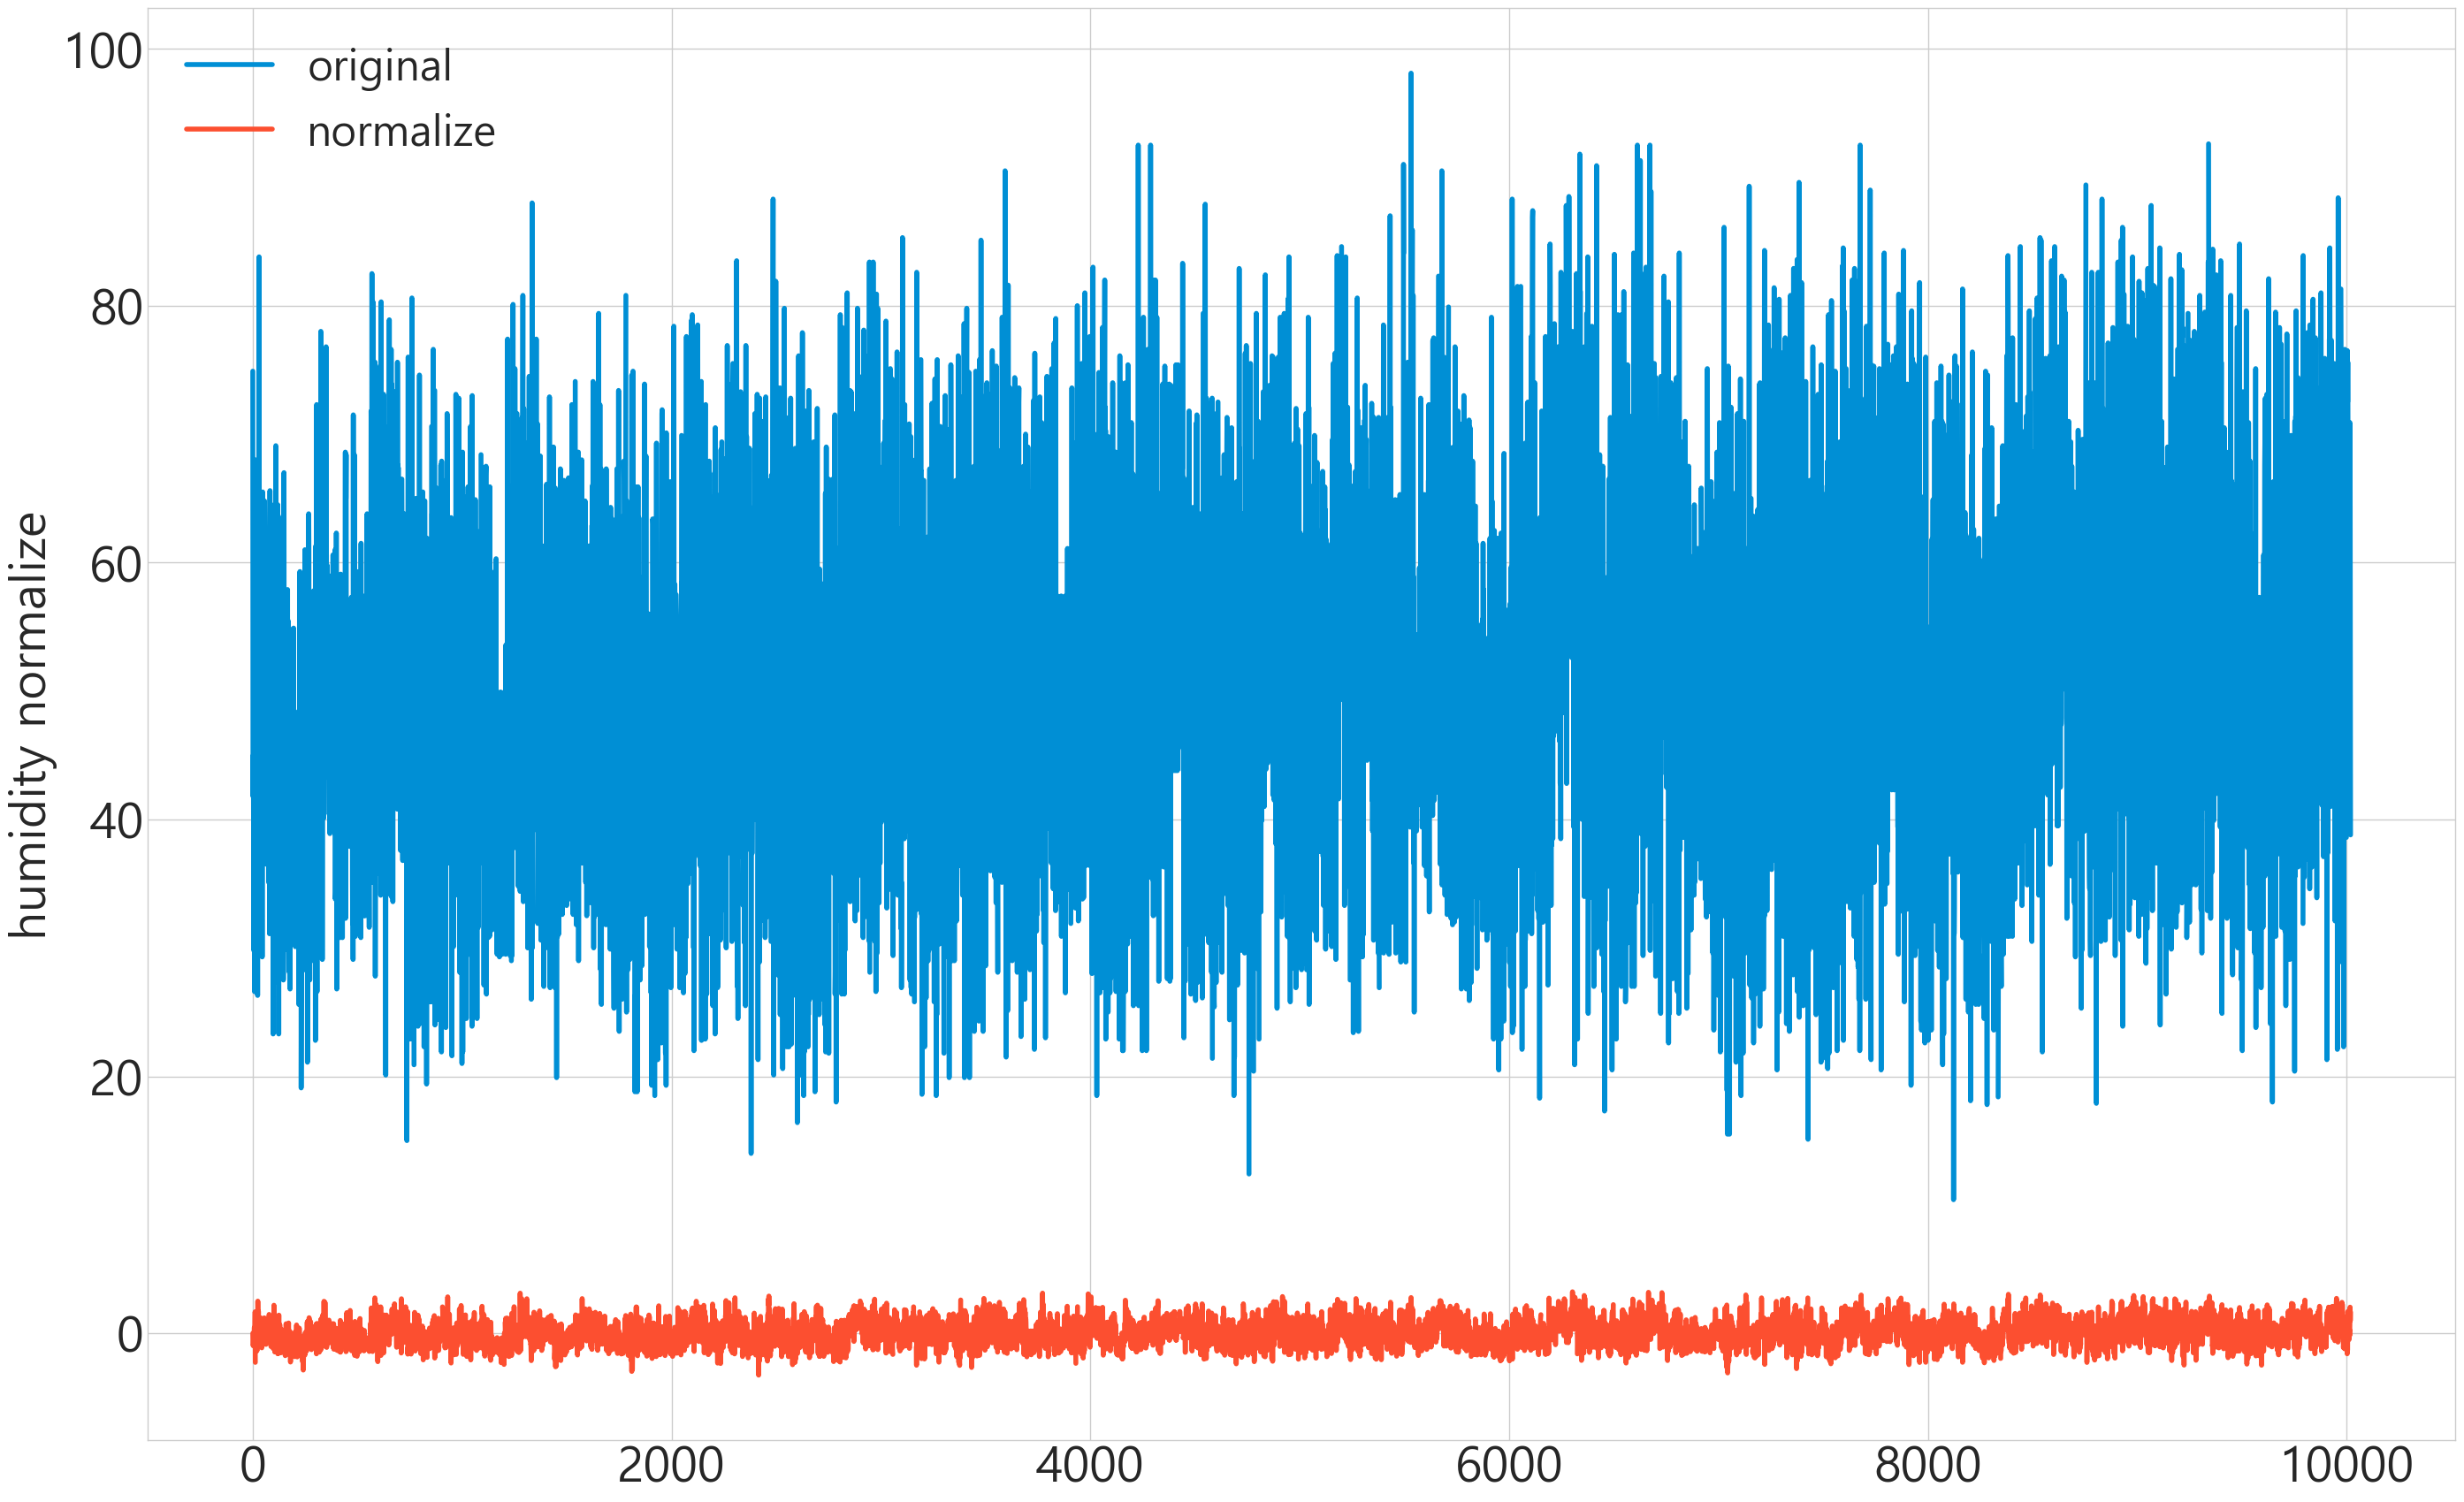

In [14]:

fig=plt.figure(figsize=(30,20),facecolor='white')
plt.plot(df.index,fire['상대습도'])
plt.plot(df.index,df['상대습도'])
plt.xticks(fontsize= 40)
plt.yticks(fontsize= 40)
plt.ylabel("humidity normalize",fontsize= 40)
plt.legend(['original','normalize'],fontsize=35)
plt.show()

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(-2000.0, 0, '-2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

(array([-5.,  0.,  5., 10., 15., 20.]),
 [Text(0, -5.0, '-5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20')])

Text(0, 0.5, 'windspeed normalize')

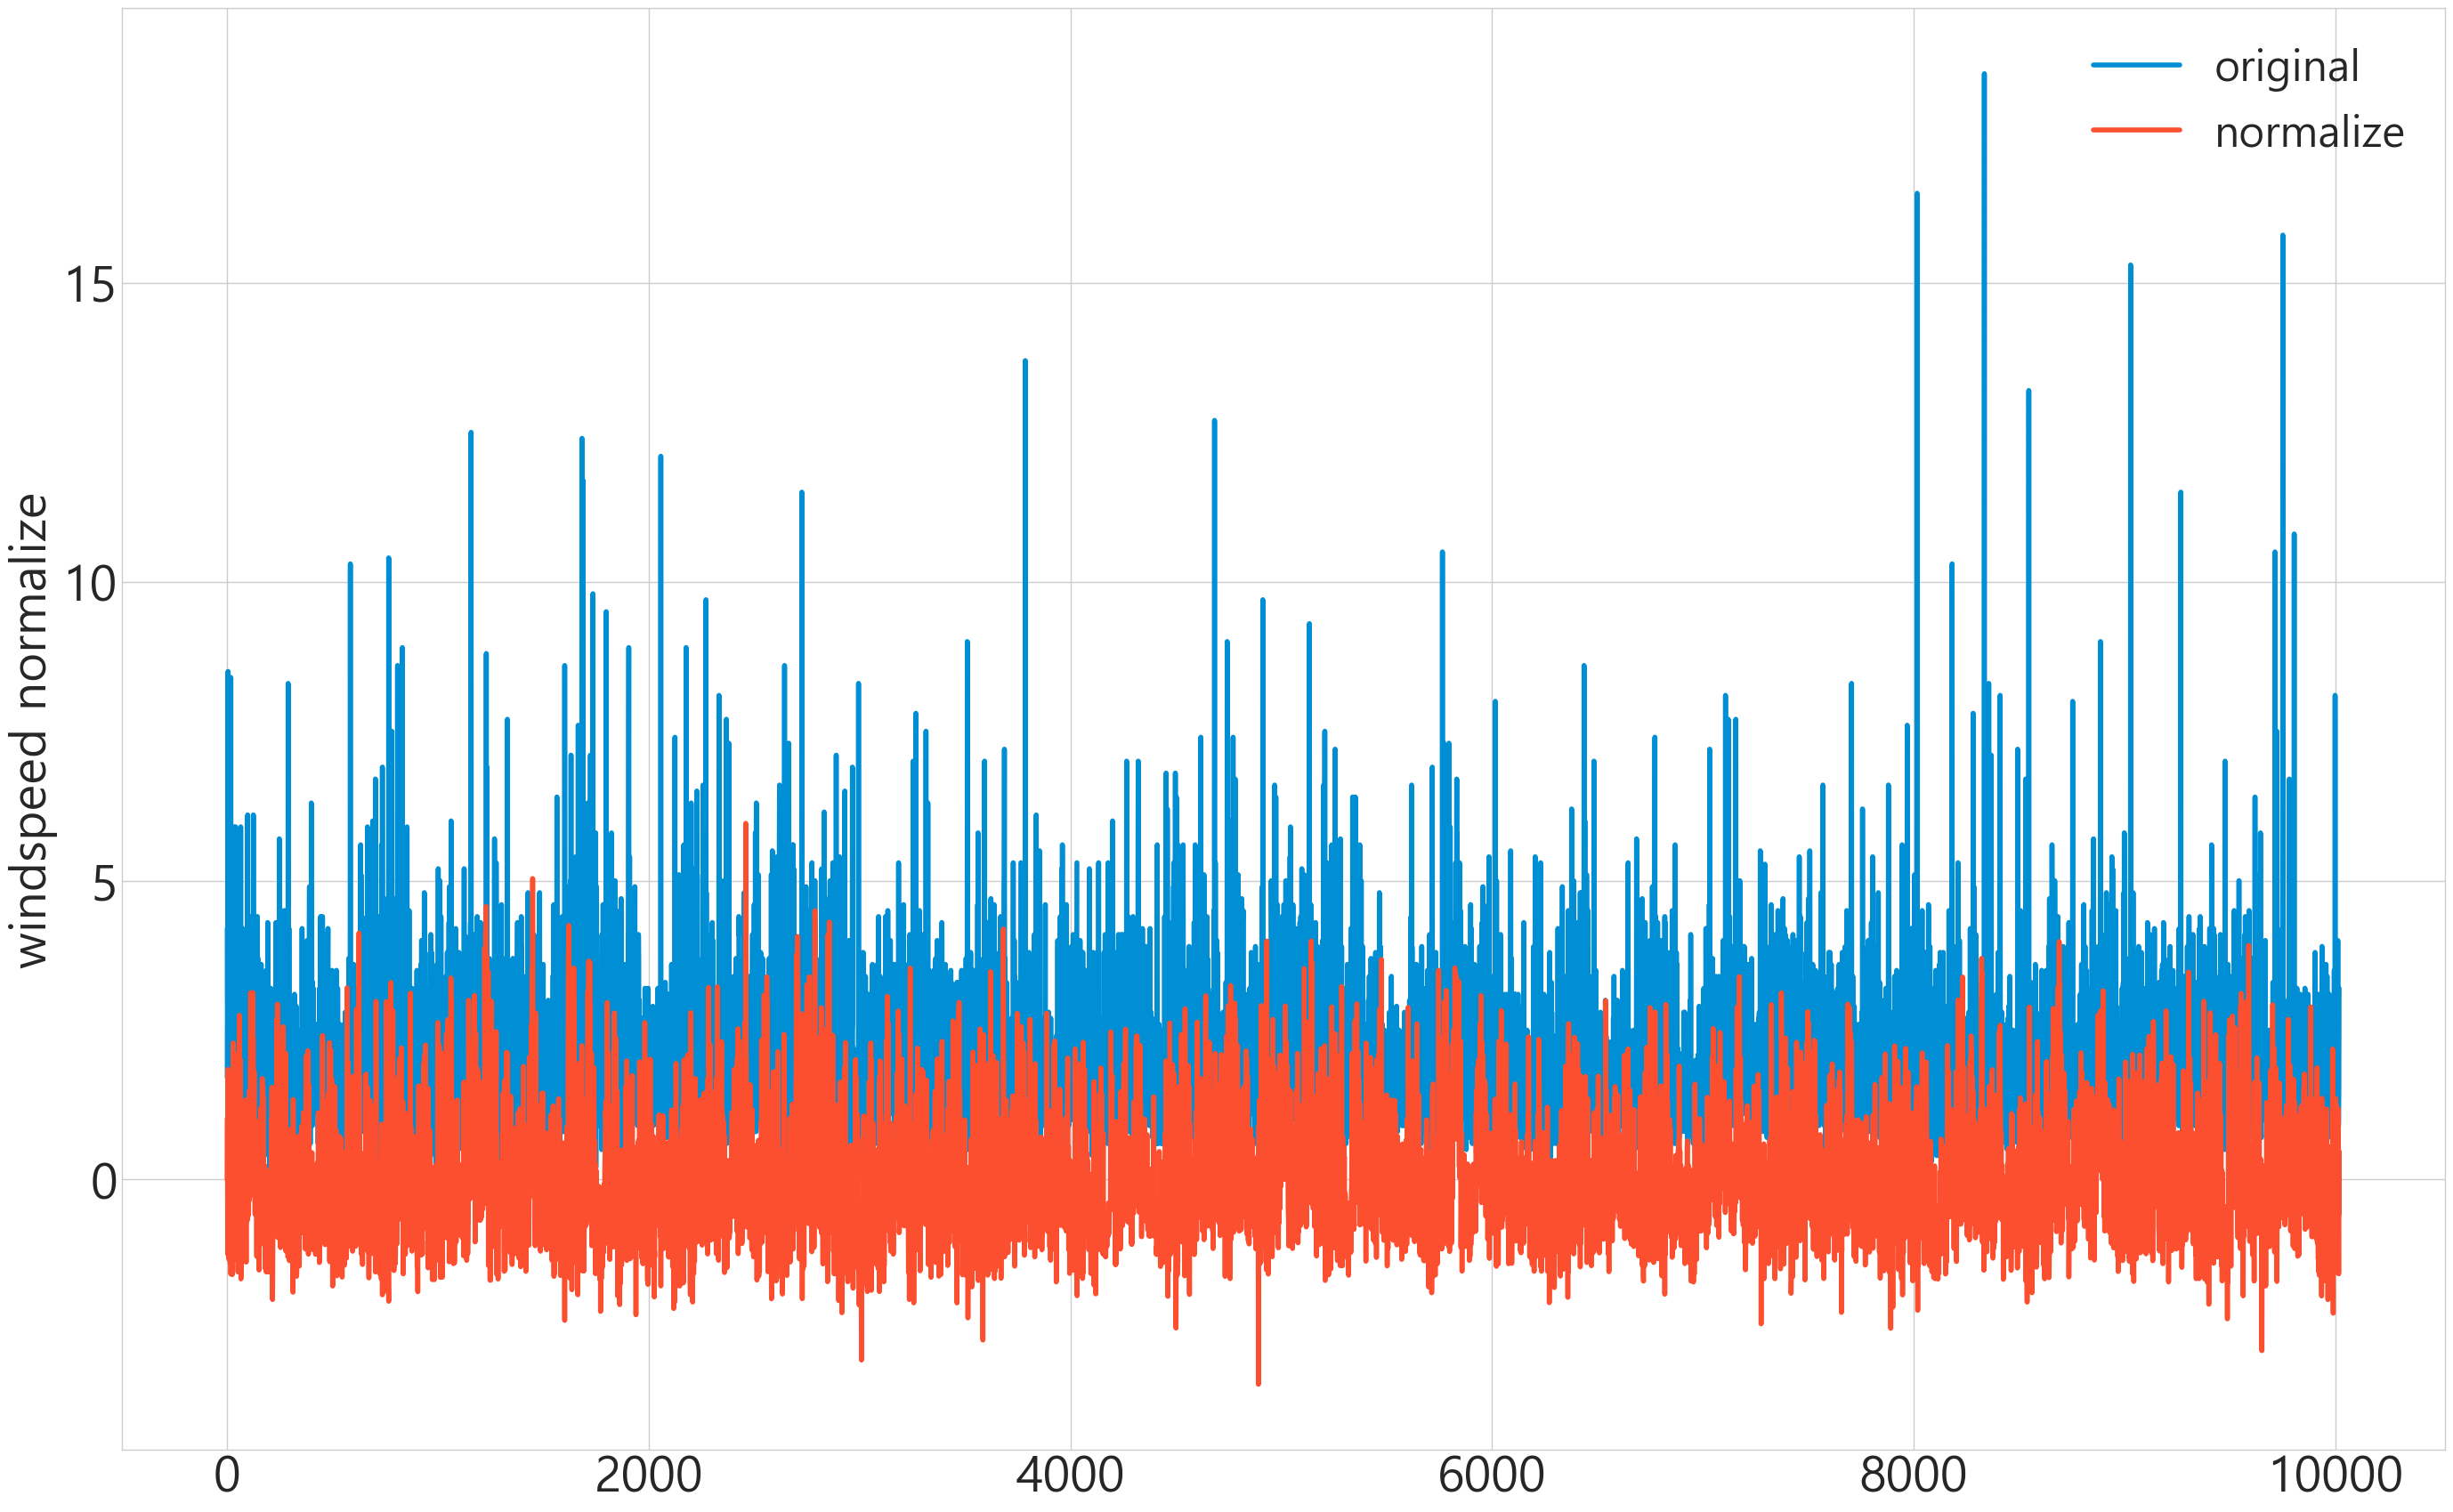

In [15]:

fig=plt.figure(figsize=(30,20),facecolor='white')
plt.plot(df.index,fire['풍속'])
plt.plot(df.index,df['풍속'])
plt.xticks(fontsize= 40)
plt.yticks(fontsize= 40)
plt.ylabel("windspeed normalize",fontsize= 40)
plt.legend(['original','normalize'],fontsize=35)
plt.show()